# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.8.0 tensorflow-gpu==2.8.0 opencv-python mediapipe scikit-learn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  +
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == 27:
            break
    cap.release()
    cv2.destroyAllWindows()

In [7]:
draw_landmarks(frame, results)

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [99]:
len(results.left_hand_landmarks.landmark) 

NameError: name 'results' is not defined

In [7]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

NameError: name 'results' is not defined

In [8]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

NameError: name 'results' is not defined

In [9]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
#lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)


NameError: name 'results' is not defined

In [11]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [12]:
result_test = extract_keypoints(results)

NameError: name 'results' is not defined

In [13]:
result_test

NameError: name 'result_test' is not defined

In [14]:
np.save('0', result_test)

NameError: name 'result_test' is not defined

In [ ]:
np.load('0.npy')

# 4. Setup Folders for Collection

In [15]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Fruits')

# Actions that we try to detect
actions = np.array(['Banano', 'Coco', 'Durazno', 'Manzana', 'Piña'])
########### Este listas de ALS, cambiar LSC #########

# Thirty videos worth of data
no_sequences = 50

# Videos are going to be 30 frames in length
sequence_length = 25

In [16]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# Guardar - primero video como clave puntos        

# 5. Collect Keypoint Values for Training and Testing

In [11]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):#start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [12]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [17]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [18]:
label_map = {label:num for num, label in enumerate(actions)}

In [19]:
label_map

{'Banano': 0, 'Coco': 1, 'Durazno': 2, 'Manzana': 3, 'Piña': 4}

In [20]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [21]:
np.array(sequences).shape

(250, 25, 1662)

In [22]:
np.array(labels).shape

(250,)

In [23]:
X = np.array(sequences)

In [24]:
X.shape

(250, 25, 1662)

In [25]:
y = to_categorical(labels).astype(int)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [27]:
y_test.shape

(13, 5)

# 7. Build and Train LSTM Neural Network

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, LSTM, Dense, Flatten
from tensorflow.keras.callbacks import TensorBoard

In [83]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
# Modelo 1
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(20,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [84]:
# Modelo 2
# Crear el modelo secuencial
model = Sequential()

# Añadir una capa convolucional
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(25, 1662)))

# Añadir una capa de pooling
model.add(MaxPooling1D(pool_size=2))

# Añadir una segunda capa convolucional
model.add(Conv1D(128, kernel_size=3, activation='relu'))

# Añadir una segunda capa de pooling
model.add(MaxPooling1D(pool_size=2))

# Añadir una tercera capa convolucional
model.add(Conv1D(128, kernel_size=3, activation='relu'))

# Utilizar GlobalMaxPooling1D en lugar de MaxPooling1D para evitar problemas de tamaño
model.add(GlobalMaxPooling1D())

# Aplanar la salida antes de las capas densas
model.add(Flatten())

# Añadir una capa densa
model.add(Dense(64, activation='relu'))

# Añadir una segunda capa densa
model.add(Dense(64, activation='relu'))

# Añadir una tercera capa densa
model.add(Dense(32, activation='relu'))

# Añadir una cuarta capa densa
model.add(Dense(32, activation='relu'))

# Añadir la capa de salida
model.add(Dense(actions.shape[0], activation='softmax'))

In [36]:
# Modelo 1
# Compilar el modelo
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [85]:
# Modelo 2
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [86]:
model.fit(X_train, y_train, epochs=400, callbacks=[tb_callback])

Epoch 1/400
8/8 [==============================] - 1s 10ms/step - loss: 1.6596 - accuracy: 0.1646
Epoch 2/400
8/8 [==============================] - 0s 11ms/step - loss: 1.6127 - accuracy: 0.1814
Epoch 3/400
8/8 [==============================] - 0s 12ms/step - loss: 1.6215 - accuracy: 0.1857
Epoch 4/400
8/8 [==============================] - 0s 9ms/step - loss: 1.6152 - accuracy: 0.1983
Epoch 5/400
8/8 [==============================] - 0s 12ms/step - loss: 1.6215 - accuracy: 0.1308
Epoch 6/400
8/8 [==============================] - 0s 12ms/step - loss: 1.6185 - accuracy: 0.2152
Epoch 7/400
8/8 [==============================] - 0s 11ms/step - loss: 1.6157 - accuracy: 0.1983
Epoch 8/400
8/8 [==============================] - 0s 11ms/step - loss: 1.6023 - accuracy: 0.2574
Epoch 9/400
8/8 [==============================] - 0s 10ms/step - loss: 1.5842 - accuracy: 0.2954
Epoch 10/400
8/8 [==============================] - 0s 11ms/step - loss: 1.5410 - accuracy: 0.3122
Epoch 11/400
8/8 [==

In [87]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 23, 64)            319168    
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 11, 64)           0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, 9, 128)            24704     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 4, 128)           0         
 1D)                                                             
                                                                 
 conv1d_11 (Conv1D)          (None, 2, 128)            49280     
                                                                 
 global_max_pooling1d_3 (Glo  (None, 128)             

# 8. Make Predictions

In [88]:
res = model.predict(X_test)

In [89]:
actions[np.argmax(res[1])]

'Coco'

In [90]:
actions[np.argmax(y_test[1])]

'Coco'

# 9. Save Weights

In [92]:
import os

# Ruta relativa o absoluta de la carpeta donde deseas guardar el modelo
save_dir = 'h5_models'

# Crear la carpeta si no existe
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Ruta completa del archivo .h5
model_path = os.path.join(save_dir, 'prueba5.h5')

# Guardar el modelo
model.save(model_path)

print(f"Modelo guardado en: {model_path}")


Modelo guardado en: h5_models\prueba5.h5


In [92]:
#del model

In [100]:
import os
print(os.path.exists(r'C:/Users/fabri/Documents/GitHub/linkproject_ia/h5_models/prueba5.h5'))


True


# 10. Evaluation using Confusion Matrix and Accuracy

In [101]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [102]:
yhat = model.predict(X_test)

In [103]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [104]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[11,  0],
        [ 0,  2]],

       [[ 8,  0],
        [ 0,  5]],

       [[12,  0],
        [ 0,  1]],

       [[11,  0],
        [ 0,  2]],

       [[10,  0],
        [ 0,  3]]], dtype=int64)

In [105]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [74]:
from scipy import stats

In [75]:
colors = [(245,117,16), (117,245,16), (16,117,245),(163,117,245),(17,117,245)]
def prob_viz (res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

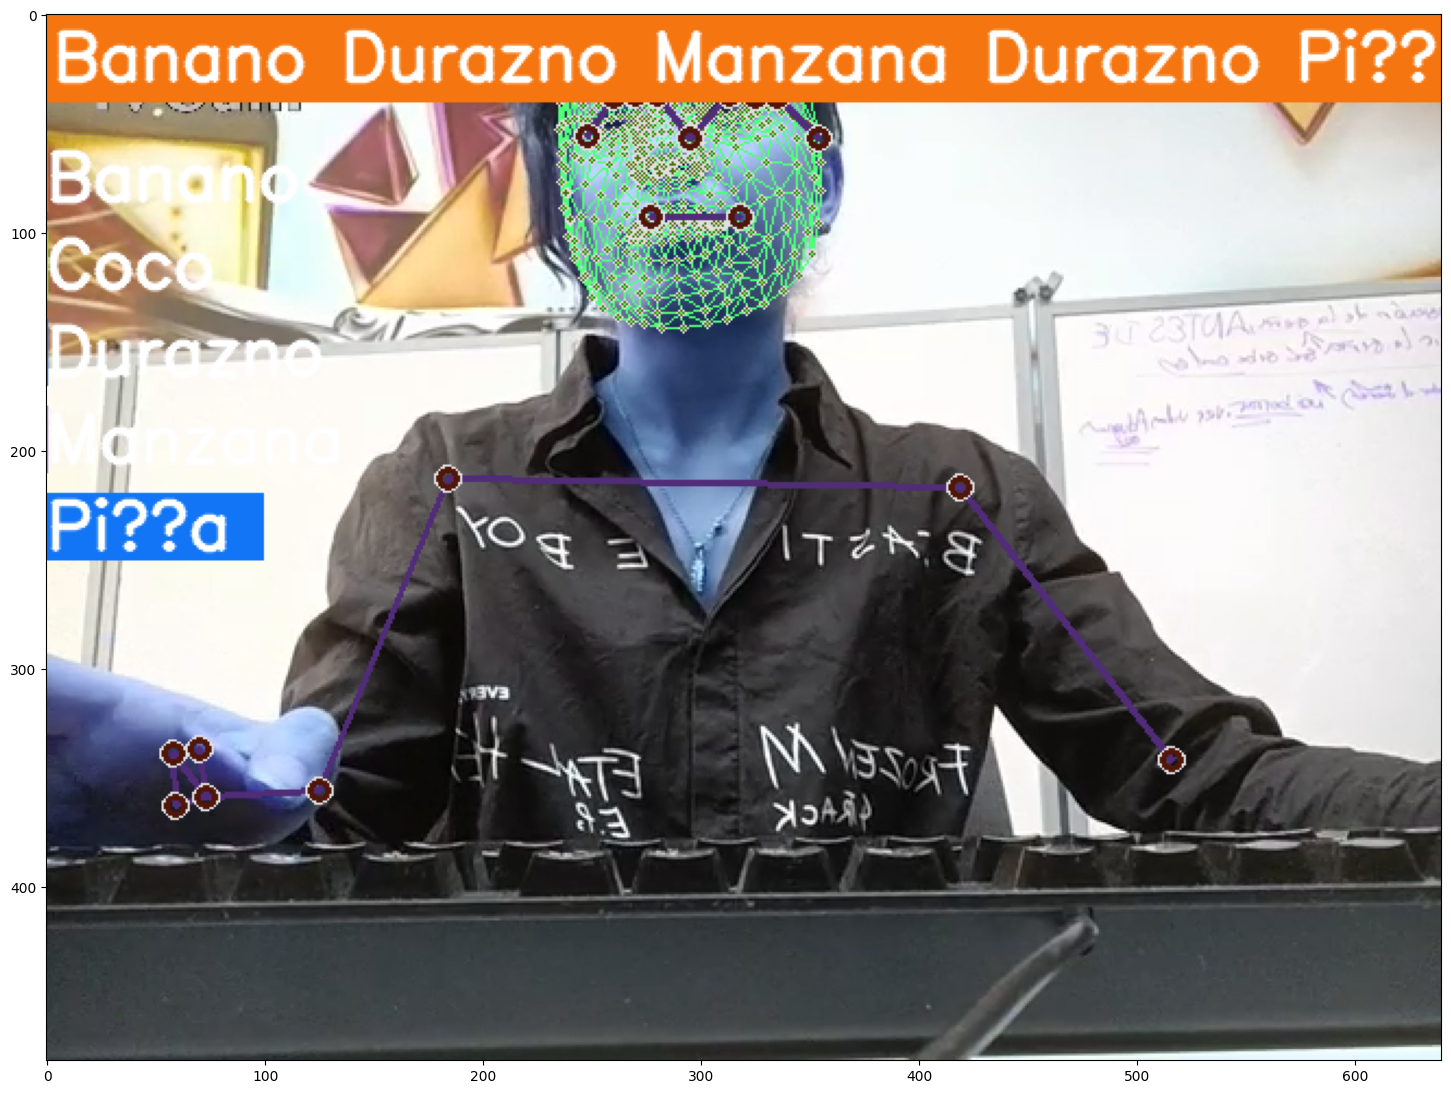

In [38]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [45]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-25:]
        
        if len(sequence) == 25:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == 27:
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti